## import stuff

In [1]:
#importing things
import pandas as pd
import os
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import sem
import scipy.stats as st
from scipy.linalg import hadamard
from scipy.stats import ttest_ind_from_stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind_from_stats
from sklearn.manifold import TSNE
from scipy.stats import pearsonr
from collections import OrderedDict
import seaborn as sns
import colorsys
from functools import reduce
from scipy.optimize import curve_fit
from operator import itemgetter
import math
import matplotlib.colors as mcolors

def lighten_color(color, amount=0.5):  
    # --------------------- SOURCE: @IanHincks ---------------------
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

def sum_digits(digit):
    return sum(int(x) for x in digit if x.isdigit())

## import data

In [2]:
kd = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20220603_CH65_QCfilt_REPfilt.csv',delimiter=',',dtype={'geno': str}),columns=('geno','MA90_mean','SI06_mean','G189E_mean'))
Frac_bound = pd.DataFrame(pd.read_csv('../../Enrichment_Inference/20220723_fracbound_v2.csv',delimiter=',',dtype={'geno': str}))
all_data = pd.DataFrame()
all_data = pd.merge(kd, Frac_bound, on='geno',how='outer')
all_data.head()

,geno,MA90_mean,SI06_mean,G189E_mean,CH65_i_MI_neg_a,CH65_i_MI_pos_a,CH65_i_MI_neg_b,CH65_i_MI_pos_b,CH65_i_MI_neg_c,CH65_i_MI_pos_c,...,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16,som_mut
0,0000000000000000,8.542521,6.0,6.0,697,4,547,4,256,12,...,0,0,0,0,0,0,0,0,0,0
1,0000000000000001,8.574179,6.0,6.0,575,2,438,3,232,13,...,0,0,0,0,0,0,0,0,1,1
2,0000000000000010,8.315518,6.0,6.0,650,7,563,2,374,6,...,0,0,0,0,0,0,0,1,0,1
3,0000000000000011,8.473877,6.0,6.0,742,6,562,18,337,19,...,0,0,0,0,0,0,0,1,1,2
4,0000000000000100,8.537724,6.0,6.0,653,6,507,10,479,14,...,0,0,0,0,0,0,1,0,0,1


In [3]:
#get germline, i2, and somatic Kd values
germ_MA90 = float(all_data['MA90_mean'].values[all_data['geno']=='0000000000000000'])
germ_SI06 = float(all_data['SI06_mean'].values[all_data['geno']=='0000000000000000'])
germ_G189E = float(all_data['G189E_mean'].values[all_data['geno']=='0000000000000000'])
I2_MA90 = float(all_data['MA90_mean'].values[all_data['geno']=='0000001010100000'])
I2_SI06 = float(all_data['SI06_mean'].values[all_data['geno']=='0000001010100000'])
I2_G189E = float(all_data['G189E_mean'].values[all_data['geno']=='0000001010100000'])
som_MA90 = float(all_data['MA90_mean'].values[all_data['geno']=='1111111111111111'])
som_SI06 = float(all_data['SI06_mean'].values[all_data['geno']=='1111111111111111'])
som_G189E = float(all_data['G189E_mean'].values[all_data['geno']=='1111111111111111'])

#get germline, i2, and somatic enrichment scores
germ_MI = float(all_data['MI_frac_mean'].values[all_data['geno']=='0000000000000000'])
germ_SI = float(all_data['SI_frac_mean'].values[all_data['geno']=='0000000000000000'])
germ_MI_e = float(all_data['MI_frac_sem'].values[all_data['geno']=='0000000000000000'])
germ_SI_e = float(all_data['SI_frac_sem'].values[all_data['geno']=='0000000000000000'])
I2_MI = float(all_data['MI_frac_mean'].values[all_data['geno']=='0000001010100000'])
I2_SI = float(all_data['SI_frac_mean'].values[all_data['geno']=='0000001010100000'])
I2_MI_e = float(all_data['MI_frac_sem'].values[all_data['geno']=='0000001010100000'])
I2_SI_e = float(all_data['SI_frac_sem'].values[all_data['geno']=='0000001010100000'])
som_MI = float(all_data['MI_frac_mean'].values[all_data['geno']=='1111111111111111'])
som_SI = float(all_data['SI_frac_mean'].values[all_data['geno']=='1111111111111111'])
som_MI_e = float(all_data['MI_frac_sem'].values[all_data['geno']=='1111111111111111'])
som_SI_e = float(all_data['SI_frac_sem'].values[all_data['geno']=='1111111111111111'])
germline = ([germ_MI,germ_MI_e,germ_SI,germ_SI_e])
i2 = ([I2_MI,I2_MI_e,I2_SI,I2_SI_e])
somatic = ([som_MI,som_MI_e,som_SI,som_SI_e])
print(germline)
print(i2)
print(somatic)

[0.0115449394306655, 0.0032179237852794, 0.0164057939800951, 0.0119634398858628]
[0.0148632042858842, 0.0021736593170568, 0.0732488393647155, 0.0284567136082147]
[0.0311946862840099, 0.0131993044954946, 0.8888787886583538, 0.0451115034174686]


In [4]:
MI_improved = all_data[all_data['MI_frac_mean']>(som_MI+som_MI_e)].copy()
MI_improved

,geno,MA90_mean,SI06_mean,G189E_mean,CH65_i_MI_neg_a,CH65_i_MI_pos_a,CH65_i_MI_neg_b,CH65_i_MI_pos_b,CH65_i_MI_neg_c,CH65_i_MI_pos_c,...,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16,som_mut
409,0000000111011001,9.207237,6.000000,6.216987,435,4,406,94,486,9,...,1,1,1,0,1,1,0,0,1,6
4287,0001001000000001,8.605986,6.000000,6.000000,531,5,408,52,299,11,...,0,0,0,0,0,0,0,0,1,3
5355,0001011001101110,8.817806,6.000000,7.445323,455,4,334,46,333,4,...,0,0,1,1,0,1,1,1,0,8
5606,0001011101101001,9.389423,6.000000,9.075222,391,4,263,36,211,8,...,1,0,1,1,0,1,0,0,1,8
6027,0001100100001110,9.017149,6.000000,6.272942,434,1,344,54,304,6,...,1,0,0,0,0,1,1,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65528,1111110101111110,9.881109,8.044777,9.344401,394,17,321,13,214,25,...,1,0,1,1,1,1,1,1,0,13
65529,1111110101111111,10.024485,8.577593,9.529011,439,12,370,28,318,20,...,1,0,1,1,1,1,1,1,1,14
65531,0010111011111000,NaN,8.692261,9.950192,303,4,211,37,280,12,...,0,1,1,1,1,1,0,0,0,9
65534,1100110111111010,NaN,6.000000,9.718486,437,4,321,98,590,6,...,1,1,1,1,1,1,0,1,0,11


In [5]:
SI_improved = all_data[all_data['SI_frac_mean']>(som_SI+som_SI_e)].copy()
SI_improved

,geno,MA90_mean,SI06_mean,G189E_mean,CH65_i_MI_neg_a,CH65_i_MI_pos_a,CH65_i_MI_neg_b,CH65_i_MI_pos_b,CH65_i_MI_neg_c,CH65_i_MI_pos_c,...,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16,som_mut
6580,0001101101110111,9.938659,8.982409,9.634917,438,4,394,7,381,12,...,1,0,1,1,1,0,1,1,1,10
6692,0001101111100111,9.958609,9.121355,9.661987,436,10,359,5,203,10,...,1,1,1,1,0,0,1,1,1,10
6704,0001101111110011,9.933406,9.232862,9.671233,443,6,387,1,293,7,...,1,1,1,1,1,0,0,1,1,10
6708,0001101111110111,9.940462,9.167631,9.646530,428,8,370,6,228,10,...,1,1,1,1,1,0,1,1,1,11
6712,0001101111111011,9.919206,9.089355,9.683559,424,8,325,5,170,7,...,1,1,1,1,1,1,0,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60320,1111101101110011,10.082679,9.023787,9.658729,362,3,344,4,221,18,...,1,0,1,1,1,0,0,1,1,12
60444,1111101111101111,10.132857,9.145618,9.672065,379,6,240,3,169,13,...,1,1,1,1,0,1,1,1,1,14
60448,1111101111110011,10.153185,9.187463,9.613134,391,5,316,10,306,13,...,1,1,1,1,1,0,0,1,1,13
60452,1111101111110111,10.094899,9.197522,9.599007,380,8,270,5,290,8,...,1,1,1,1,1,0,1,1,1,14


In [10]:
MI_improved_abbrev

,pos1
409,0
4287,0
5355,0
5606,0
6027,0
...,...
65528,1
65529,1
65531,0
65534,1


<AxesSubplot:>

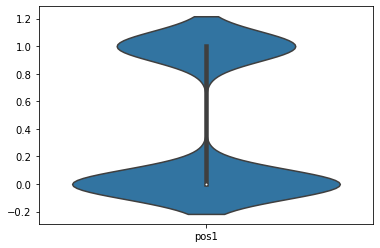

In [9]:
MI_improved_abbrev = MI_improved[['pos1']].copy()
sns.violinplot(data=MI_improved_abbrev)